# Lecture 2: LSI Systems and Convolution in 1D - extra materials


In [ ]:
## MP 573 Lecture 2: LSI Systems and Convolution in 1D - extra materials
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

# Linearity and shift-invariance of convolution based systems 
## (From previous lecture's quiz)
Suppose we have a system with input $f(x)$ and output $g(x)$, such that the output is given by $g(x) = \int_{-\infty}^{\infty} f(x^\prime) h(x - x^\prime) dx^\prime$, ie: a convolution of the input $f(x)$ with some known impulse response $h(x)$. 

How do we show whether this system is linear, and how do we show whether it is shift invariant?


## Is it linear? 

What if the input to our system is $f_3(x) = a_1 f_1(x) + a_2 f_2(x)$

Check whether $g_3(x) = a_1 g_1(x) + a_2 g_2(x)$ ???

$g_3(x) = \int ( a_1 f_1(x^\prime) + a_2 f_2(x^\prime) ) h(x - x^\prime) dx = a_1 \int f_1(x^\prime) h(x - x^\prime) dx + a_2 \int f_2(x^\prime) h(x - x^\prime) dx$

$g_3(x) =a_1 g_1(x) + a_2 g_2(x)$ 

## Is it shift invariant? 
What if the input to our system is $f_2(x) = f_1(x-x_0)$


$g_2(x) = \int_{-\infty}^{\infty} f_2(x^\prime) h(x - x^\prime) dx^\prime = \int_{-\infty}^{\infty} f_1(x^\prime - x_0) h(x - x^\prime) dx^\prime $

$ x^{\prime \prime} = x^\prime - x_0$

$ x^{\prime} = x^{\prime \prime} + x_0$




$g_2(x) = \int_{-\infty}^{\infty} f_1(x^{\prime \prime}) h(x - x_0 - x^{\prime \prime}) dx^{\prime \prime} $

Remember the output to $f_1$ is: 

$g_1(x) = \int_{-\infty}^{\infty} f_1(x^{\prime \prime}) h(x - x^{\prime \prime}) dx^{\prime \prime} $


So this means that $g_2(x)$ is exactly $g_1$ evaluated at $x-x_0$, ie: $g_2(x) = g_1(x - x_0)$

## Absolute value system

$g(x) = |f(x)|$

## Linear? 

$f_1(x) = 1$, $a_1 = -5$

$f_2(x) = a_1 f_1(x) = -5$

$g_1(x) = |f_1(x)| = 1$

$g_2(x) = |f_2(x)| = |-5| = 5 \neq a_1 g_1(x)$

(Counterexample, therefore not linear)

## Shift invariant? 

Say we have some $f_1(x)$ that leads to $g_1(x) = |f_1(x)|$

Now we run $f_2(x) = f_1(x-x_0)$ through our system

$g_2(x) = |f_2(x)| = |f_1(x - x_0)|$

$g_2(x) = g_1(x - x_0)$

## Sinusoidal system



# Convolution
Let's create two signals and go over the convolution integral, both evaluated at a single value of x, as well as the overall result plotted over all values of x.

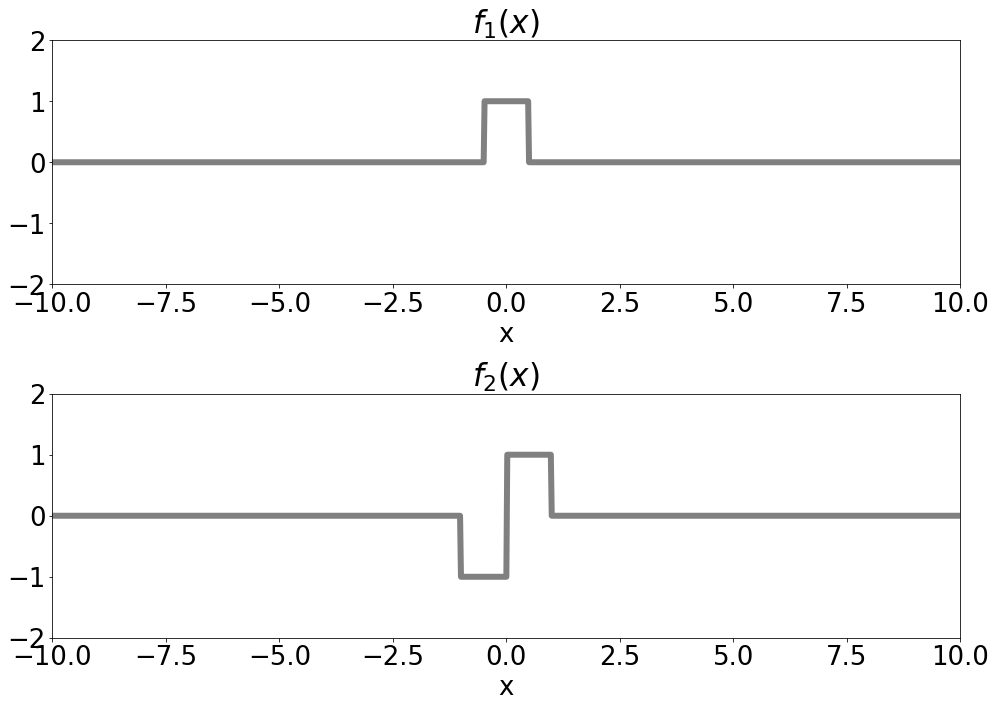

In [60]:
# Simulate 1D input signal f1(x) and f2(x)
N = 1001
xmax = 10
x = np.linspace(-xmax,xmax,N)
dx = x[1]-x[0]
f1 = 1.0*(np.abs(x)<0.5)
f2 = 1.0*(np.abs(x-0.5)<0.5) - 1.0*(np.abs(x+0.5)<=0.5)
# f2 = 1.0*(np.abs(x-2)<0.01)/dx # Approximated delta function

font = {'weight' : 'normal',
        'size'   : 26}

# Plot the two signals
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.rc('font', **font)
plt.plot(x,f1,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('$f_1(x)$')
plt.subplot(2,1,2)
plt.rc('font', **font)
plt.plot(x,f2,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x)$')
plt.xlabel('x')
plt.tight_layout(pad=0.5)

Value of the convolution f3(x) = [f_1 * f_2] (x) evaluated at x = 0.5  is  0.98


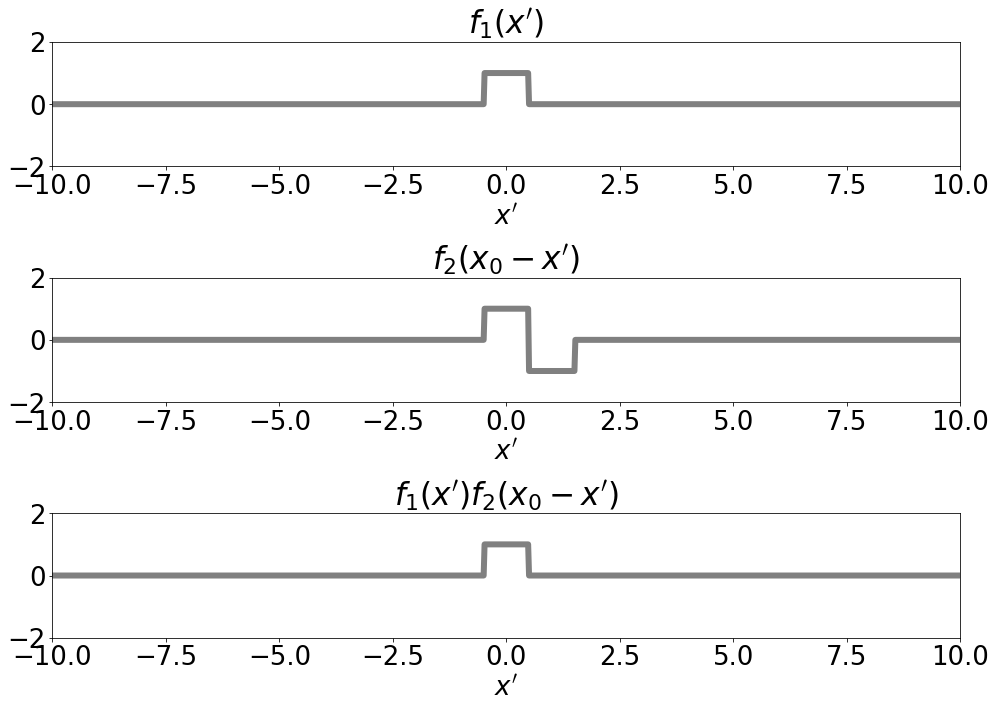

In [70]:
# Now let's look at the convolution integral (sum in reality since we are in a discrete example) 
# evaluated at a particular value of x = x0

x0 = 0.5

f1_xprime = f1

f2_flipped = f2[N-1::-1]
h =  (x==x0) # Delta function at x0
f2_xprime = signal.convolve(h, f2_flipped, mode='same') # Shift by x0, notice implementation as convolution

# Plot the two signals as a function of x', as they appear in the convolution integral
plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.rc('font', **font)
plt.plot(x,f1_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('$x^{\prime}$')
plt.title('$f_1(x^{\prime})$')
plt.subplot(3,1,2)
plt.rc('font', **font)
plt.plot(x,f2_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x_0 - x^{\prime})$')
plt.xlabel('$x^{\prime}$')
plt.tight_layout(pad=0.5)
plt.subplot(3,1,3)
plt.rc('font', **font)
plt.plot(x,f1_xprime*f2_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_1(x^{\prime}) f_2(x_0 - x^{\prime})$')
plt.xlabel('$x^{\prime}$')
plt.tight_layout(pad=0.5)


# Value of the convolution integral at x=x0 (integral evaluated numerically as a sum)
f3_at_x0 = np.sum(f1_xprime*f2_xprime)*dx
print("Value of the convolution f3(x) = [f_1 * f_2] (x) evaluated at x =", '{:.3}'.format(x0)  , " is ", '{:.3}'.format(f3_at_x0))

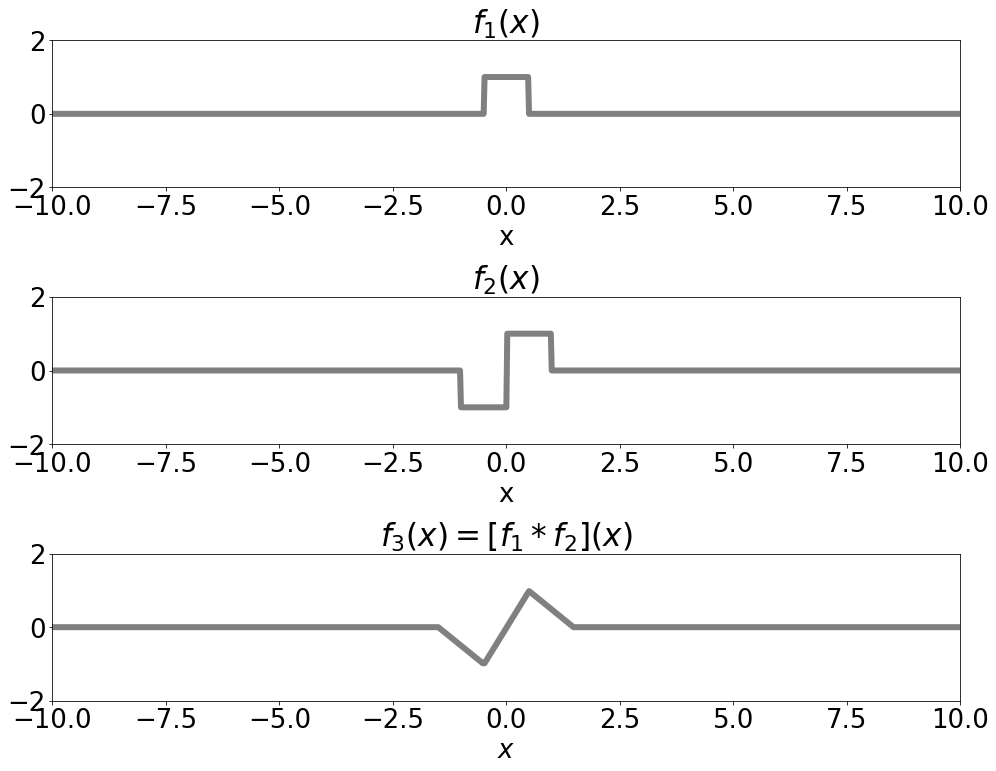

In [73]:
# Now let's evaluate this overall convolution  
f3 = dx*signal.convolve(f1, f2, mode='same')


# Plot the two signals f1 and f2, and their convolution f3
plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.rc('font', **font)
plt.plot(x,f1,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('$f_1(x)$')
plt.subplot(3,1,2)
plt.rc('font', **font)
plt.plot(x,f2,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x)$')
plt.xlabel('x')
plt.tight_layout(pad=0.5)
plt.subplot(3,1,3)
plt.rc('font', **font)
plt.plot(x,f3,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_3(x) = [f_1 * f_2] (x)$')
plt.xlabel('$x$');